In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [ ]:
col_name=["buying","maint","doors","persons","boot","safety","class"]
df.columns=col_name
col_name

['buying', 'maint', 'doors', 'persons', 'boot', 'safety', 'class']

In [ ]:
df.head()

,buying,maint,doors,persons,boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.shape

(1727, 7)

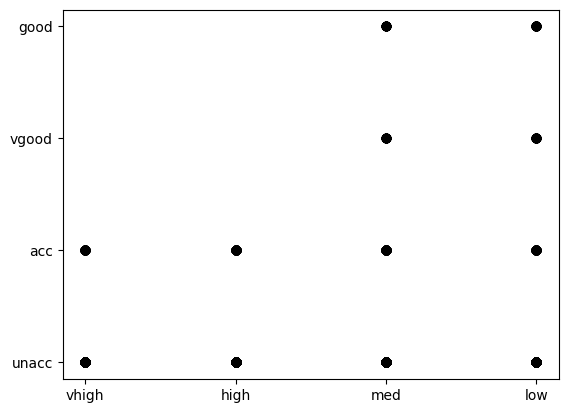

In [ ]:
plt.scatter(df["buying"],df["class"],c="black")
plt.show()

<Axes: xlabel='buying', ylabel='class'>

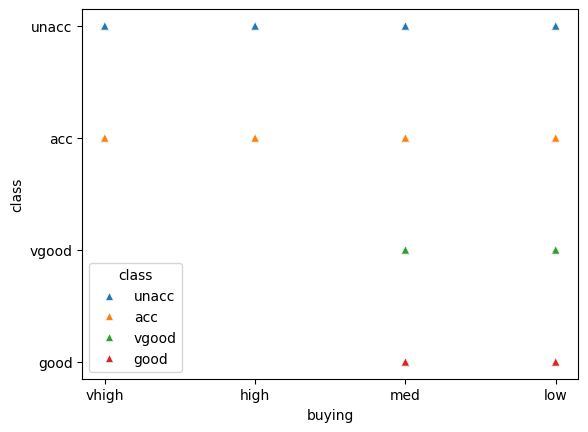

In [ ]:
sns.scatterplot(x="buying",y="class",data=df,hue="class",marker="^")

In [ ]:
x=df.drop(["class"],axis=1)
y=df["class"]

In [ ]:
df["class"].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(1381, 6)

In [ ]:
y_train.shape

(1381,)

In [ ]:
x_test.shape

(346, 6)

In [ ]:
y_test.shape

(346,)

In [ ]:
!pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','boot','safety'])
x_train=encoder.fit_transform(x_train)
x_test=encoder.transform(x_test)

In [ ]:
x_train.head()

,buying,maint,doors,persons,boot,safety
1648,1,1,1,1,1,1
1465,1,2,2,1,2,1
361,2,1,1,2,1,1
315,2,3,3,3,1,2
1372,1,4,2,3,3,1


In [ ]:
x_test.head()

,buying,maint,doors,persons,boot,safety
1318,1,4,4,3,3,1
124,2,2,4,2,2,1
648,3,3,4,1,1,2
249,2,3,1,1,2,2
1598,1,3,3,1,2,3


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)
clf_gini.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred=clf_gini.predict(x_test)
y_pred

array(['unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'un

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7890173410404624

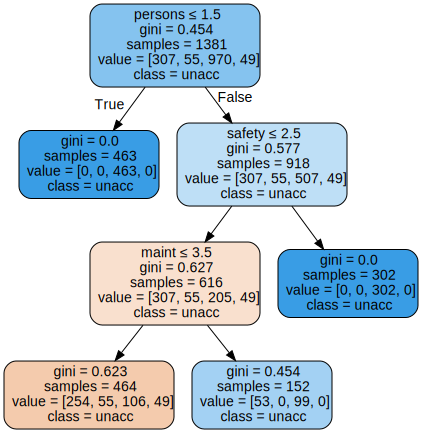

In [ ]:
import graphviz
from sklearn import tree
data=tree.export_graphviz(clf_gini,out_file=None,feature_names=x_train.columns,class_names=y_train,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(data)
graph

In [ ]:
features=pd.DataFrame({"Features":x_train.columns,"importance":np.round(clf_gini.feature_importances_,3)})
features=features.sort_values("importance",ascending=False)

In [ ]:
vfeatures

,Features,importance
5,safety,0.532
3,persons,0.364
1,maint,0.103
0,buying,0.000
2,doors,0.000
4,boot,0.000
